Task 1: Load and Explore the Dataset

In [85]:
import pandas as pd
try:
    df = pd.read_csv('sales.csv')  # Load the CSV file into a DataFrame
    print(df.head()) # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("The file 'sales.csv' was not found. Please check the file path and try again.")

         date             datetime cash_type  money            coffee_name
0  2025-02-08  2025-02-08 14:26:04      cash   15.0                    Tea
1  2025-02-08  2025-02-08 14:28:26      cash   15.0                    Tea
2  2025-02-08  2025-02-08 14:33:04      card   20.0               Espresso
3  2025-02-08  2025-02-08 15:51:04      card   30.0  Chocolate with coffee
4  2025-02-08  2025-02-08 16:35:01      cash   27.0    Chocolate with milk


In [86]:
df.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         262 non-null    object 
 1   datetime     262 non-null    object 
 2   cash_type    262 non-null    object 
 3   money        262 non-null    float64
 4   coffee_name  262 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


In [87]:
# Check for missing values and clean the dataset
df_cleaned = df.dropna()  # Drop rows with any missing values
df_cleaned = df.fillna({'money': df['money'].mean()})  # Fill missing 'money' values with the mean
df_cleaned.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


Task 2: Basic Data Analysis

In [88]:
df_cleaned.describe()  # Get summary statistics of numerical columns

,money
count,262.00000
mean,26.29771
std,4.25021
min,15.00000
25%,25.00000
50%,27.00000
75%,29.00000
max,33.00000


In [89]:
df.groupby('cash_type')['money'].sum()  # Total income per cash_type

cash_type
card    4869.0
cash    2021.0
Name: money, dtype: float64

In [90]:
df.groupby('cash_type')['money'].mean()  # Average income per cash_type

cash_type
card    26.752747
cash    25.262500
Name: money, dtype: float64

In [91]:
# Analyze sales patterns by coffee_name and cash_type
top_coffees = df_cleaned['coffee_name'].value_counts().head(5)
income_by_coffee = df_cleaned.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)
income_by_cash_type = df_cleaned.groupby('cash_type')['money'].sum()

print("Top 5 most sold coffee types:\n", top_coffees)
print("\nTop 5 coffee types by total income:\n", income_by_coffee)
print("\nTotal income by payment type:\n", income_by_cash_type)

Top 5 most sold coffee types:
 coffee_name
Americano with milk          44
Latte                        24
Irish whiskey                21
Espresso                     18
Coffee with Irish whiskey    16
Name: count, dtype: int64

Top 5 coffee types by total income:
 coffee_name
Americano with milk          1100.0
Latte                         792.0
Irish whiskey                 525.0
Cappuccino                    480.0
Coffee with Irish whiskey     464.0
Name: money, dtype: float64

Total income by payment type:
 cash_type
card    4869.0
cash    2021.0
Name: money, dtype: float64


Task 3: Data Visualization

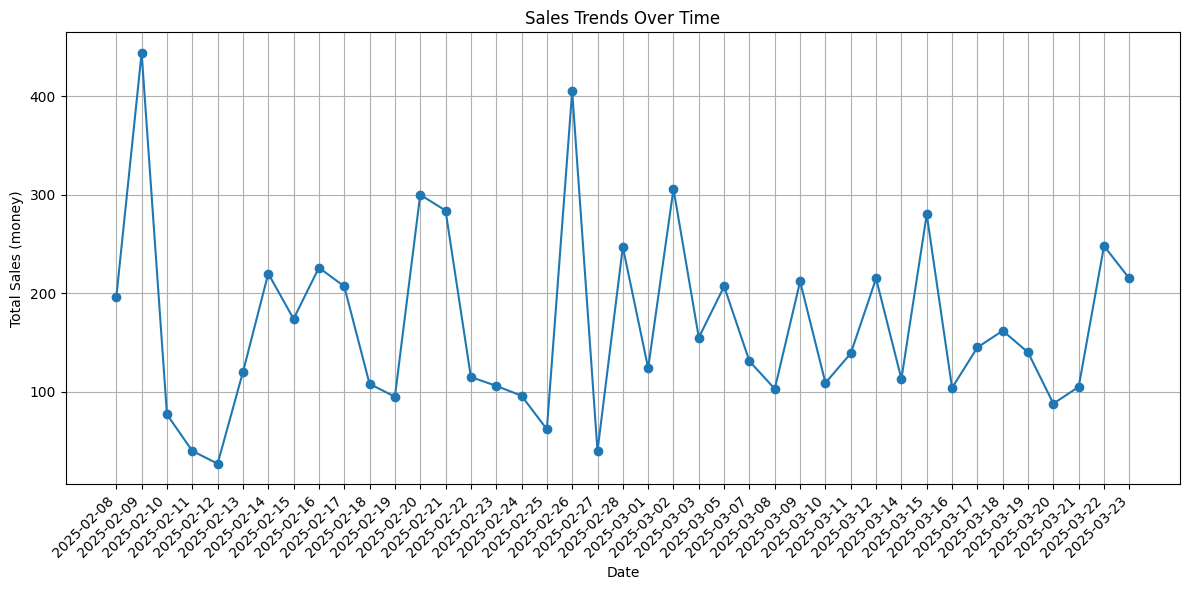

In [92]:
import matplotlib.pyplot as plt

# Group by date and sum money to get daily sales
daily_sales = df_cleaned.groupby('date')['money'].sum()
#Line chart for sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (money)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

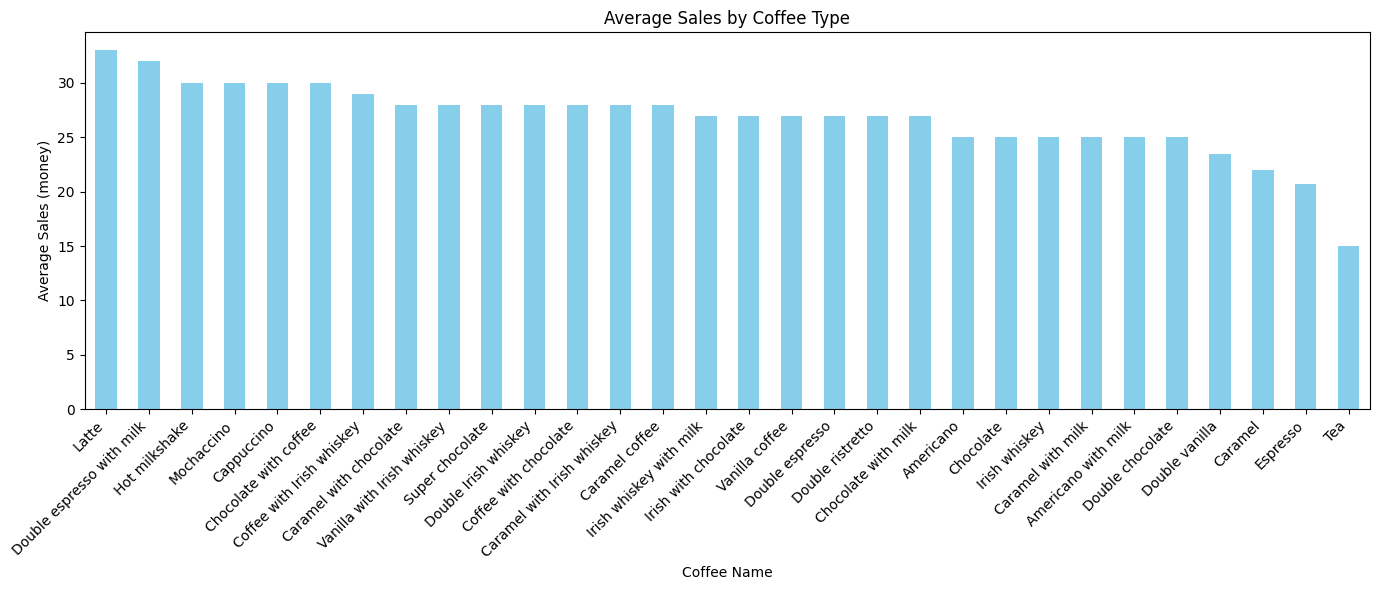

In [93]:
# Bar chart for average sales per coffee type
avg_sales_by_coffee = df_cleaned.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
avg_sales_by_coffee.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Coffee Type')
plt.xlabel('Coffee Name')
plt.ylabel('Average Sales (money)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

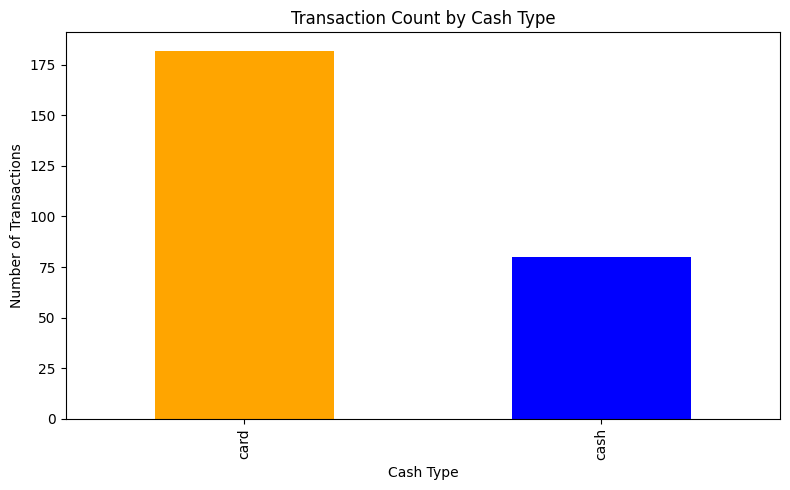

In [94]:
# histogram for payment distribution
plt.figure(figsize=(8, 5))
df_cleaned['cash_type'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Transaction Count by Cash Type')
plt.xlabel('Cash Type')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

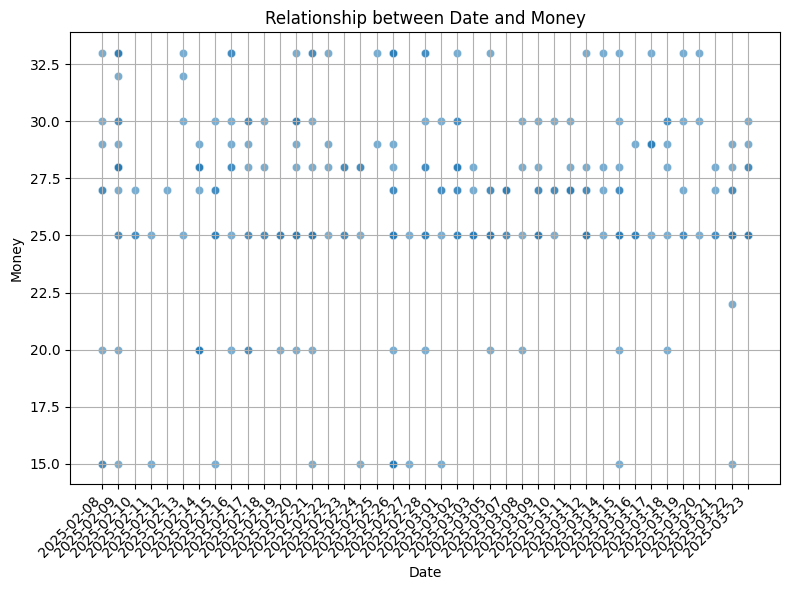

In [ ]:
import seaborn as sns

# Scatter plot with seaborn styling
# Relationship between date and money
plt.figure(figsize=(8, 6))
sns.scatterplot(x='date', y='money', data=df_cleaned, alpha=0.6)
plt.title('Relationship between Date and Money')
plt.xlabel('Date')
plt.ylabel('Money')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()